<a href="https://colab.research.google.com/github/Vanshree005/FUTURE_ML_01/blob/main/ML_1_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('/content/sales_data_sample.csv', encoding='latin1')


df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], infer_datetime_format=True, errors='coerce')

# Drop rows where ORDERDATE could not be parsed
df = df.dropna(subset=['ORDERDATE'])

# Basic overview
print("Parsed ORDERDATE range:", df['ORDERDATE'].min(), "to", df['ORDERDATE'].max())
print("\nMissing values after parsing:")
print(df.isnull().sum())

Parsed ORDERDATE range: 2003-01-06 00:00:00 to 2005-05-31 00:00:00

Missing values after parsing:
ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


<ipython-input-2-a7052cb73334>:9: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], infer_datetime_format=True, errors='coerce')


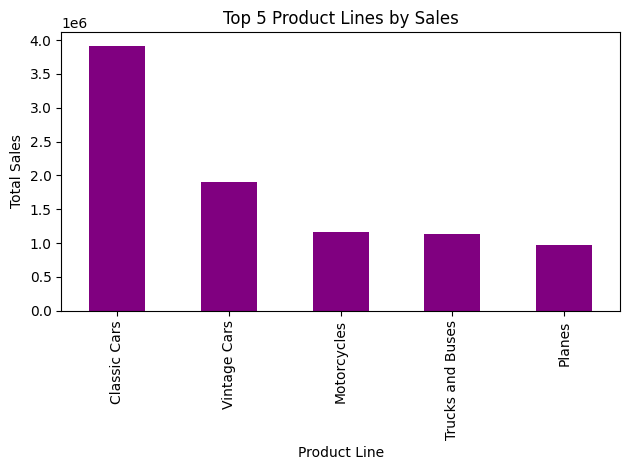

In [ ]:
# Top 5 Product Lines by Sales
product_sales = df.groupby('PRODUCTLINE')['SALES'].sum().nlargest(5)
plt.figure()
product_sales.plot(kind='bar', color='purple')
plt.title('Top 5 Product Lines by Sales')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()



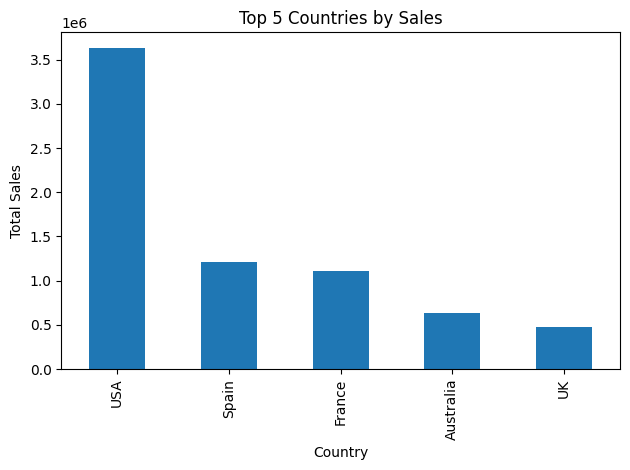

In [ ]:
# Sales by Country
country_sales = df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False).head(5)
plt.figure()
country_sales.plot(kind='bar')
plt.title('Top 5 Countries by Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


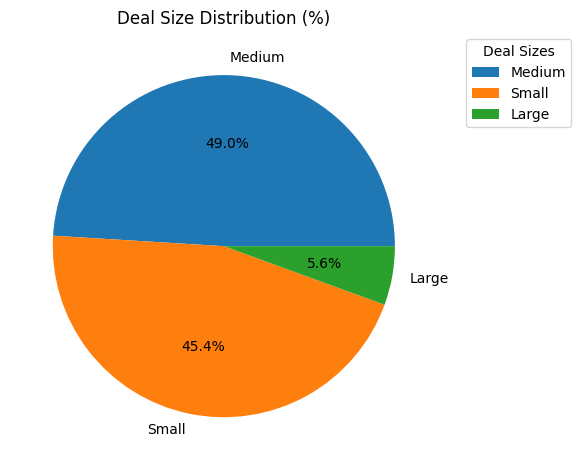

In [ ]:

# Deal size distribution
plt.figure()

deal_counts.plot(kind='pie', autopct='%1.1f%%', labels=deal_counts.index)  # Add labels

plt.title('Deal Size Distribution (%)')
plt.ylabel('')
plt.tight_layout()

# Add a legend to the plot
plt.legend(title="Deal Sizes", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


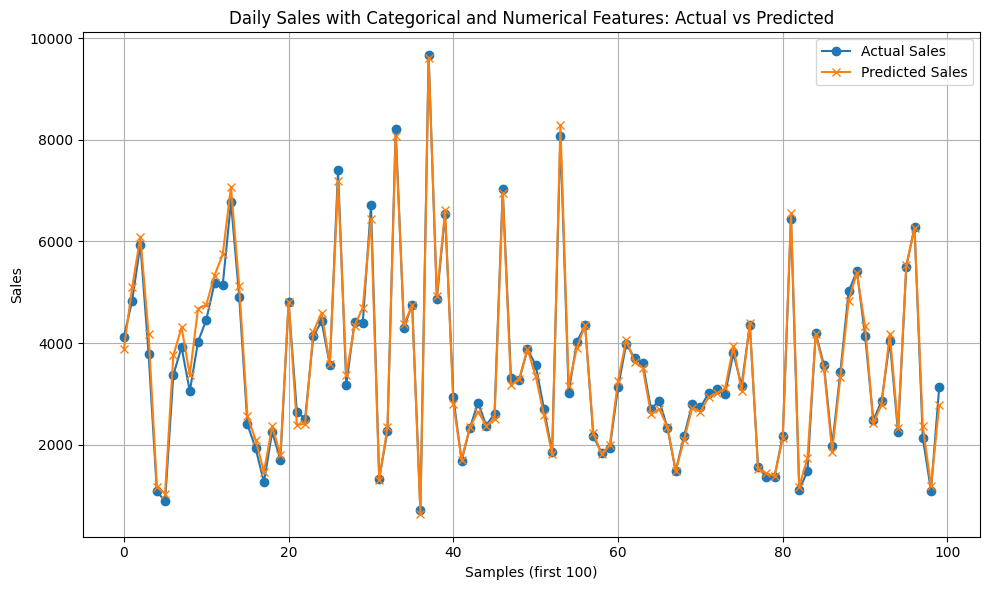

In [12]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')
df = df.dropna(subset=['ORDERDATE'])

# Create 'DAY' feature representing the day of the month
df['DAY'] = df['ORDERDATE'].dt.day.astype(str)

# Update features_to_use and categorical_features
features_to_use = ['DAY', 'PRODUCTLINE', 'CITY', 'STATE', 'COUNTRY', 'DEALSIZE',
                   'QUANTITYORDERED', 'PRICEEACH', 'MSRP', 'QTR_ID', 'PRODUCTCODE']
categorical_features = ['PRODUCTLINE', 'CITY', 'STATE', 'COUNTRY', 'DEALSIZE', 'DAY', 'PRODUCTCODE']
numeric_features = ['QUANTITYORDERED', 'PRICEEACH', 'MSRP', 'QTR_ID']
df[categorical_features] = df[categorical_features].astype(str)
grouped = df.groupby(features_to_use, as_index=False).agg({
 'SALES': 'sum',
 'QUANTITYORDERED': 'mean',
 'PRICEEACH': 'mean',
 'MSRP': 'mean',
 'QTR_ID': 'first'
})
preprocessor = ColumnTransformer([
 ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features),
 ('num', MinMaxScaler(), numeric_features)
])
X = preprocessor.fit_transform(grouped[categorical_features + numeric_features])
sales = grouped['SALES'].astype(float).values.reshape(-1, 1)
y_scaler = MinMaxScaler()
y = y_scaler.fit_transform(sales)
model = tf.keras.Sequential([
    tf.keras.Input(shape=(X.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# ... (previous code for data preparation and model creation) ...
model = tf.keras.Sequential([
    tf.keras.Input(shape=(X.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=100, verbose=0)

# Predict and inverse transform
y_pred = model.predict(X)
y_pred_rescaled = y_scaler.inverse_transform(y_pred)
y_true_rescaled = y_scaler.inverse_transform(y)

# Plot actual vs predicted sales (first 100 samples)
plt.figure(figsize=(10, 6))
plt.plot(y_true_rescaled[:100], label='Actual Sales', marker='o')
plt.plot(y_pred_rescaled[:100], label='Predicted Sales', marker='x')
plt.title('Daily Sales with Categorical and Numerical Features: Actual vs Predicted')
plt.xlabel('Samples (first 100)')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('/content/sales_data_sample.csv', encoding='latin-1')
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')
df = df.dropna(subset=['ORDERDATE'])
df['MONTH'] = df['ORDERDATE'].dt.to_period('M').astype(str)
features_to_use = ['MONTH', 'PRODUCTLINE', 'CITY', 'STATE', 'COUNTRY', 'DEALSIZE',
 'QUANTITYORDERED', 'PRICEEACH', 'MSRP', 'QTR_ID', 'PRODUCTCODE']
categorical_features = ['PRODUCTLINE', 'CITY', 'STATE', 'COUNTRY', 'DEALSIZE','MONTH','PRODUCTCODE']
numeric_features = ['QUANTITYORDERED', 'PRICEEACH', 'MSRP', 'QTR_ID']
df[categorical_features] = df[categorical_features].astype(str)
grouped = df.groupby(features_to_use, as_index=False).agg({
 'SALES': 'sum',
 'QUANTITYORDERED': 'mean',
 'PRICEEACH': 'mean',
 'MSRP': 'mean',
 'QTR_ID': 'first'
})


In [10]:
preprocessor = ColumnTransformer([
 ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features),
 ('num', MinMaxScaler(), numeric_features)
])
X = preprocessor.fit_transform(grouped[categorical_features + numeric_features])
sales = grouped['SALES'].astype(float).values.reshape(-1, 1)
y_scaler = MinMaxScaler()
y = y_scaler.fit_transform(sales)
model = tf.keras.Sequential([
    tf.keras.Input(shape=(X.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])


89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


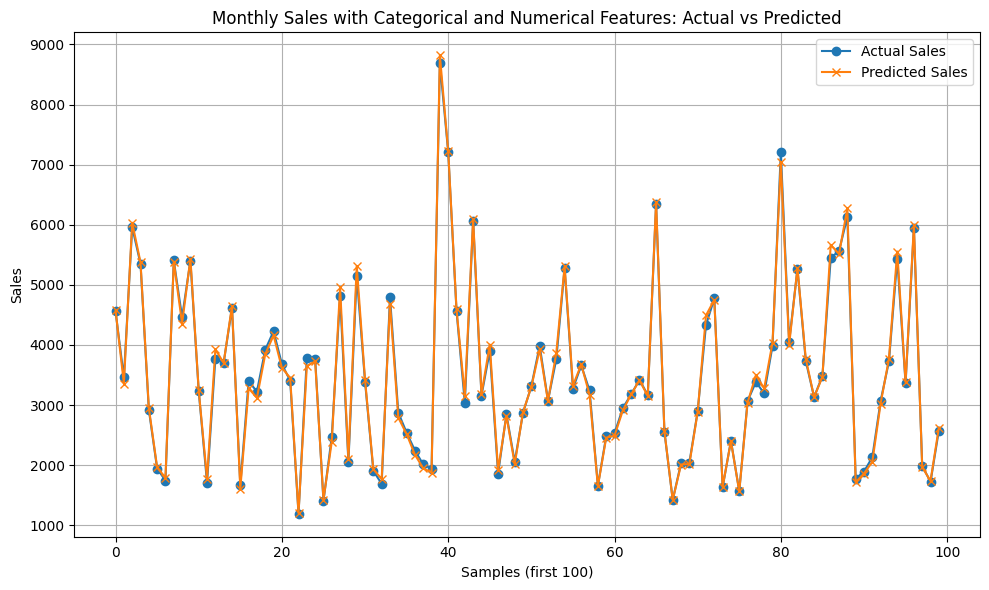

Mean Absolute Error (MAE): 64.00
Mean Squared Error (MSE): 7787.14
R² Score: 0.9977


In [13]:
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=100, verbose=0)

# Predict and inverse transform
y_pred = model.predict(X)
y_pred_rescaled = y_scaler.inverse_transform(y_pred)
y_true_rescaled = y_scaler.inverse_transform(y)

# Plot actual vs predicted sales
plt.figure(figsize=(10, 6))
plt.plot(y_true_rescaled[:100], label='Actual Sales', marker='o')
plt.plot(y_pred_rescaled[:100], label='Predicted Sales', marker='x')
plt.title('Monthly Sales with Categorical and Numerical Features: Actual vs Predicted')
plt.xlabel('Samples (first 100)')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Print accuracy metrics
mae = mean_absolute_error(y_true_rescaled, y_pred_rescaled)
mse = mean_squared_error(y_true_rescaled, y_pred_rescaled)
r2 = r2_score(y_true_rescaled, y_pred_rescaled)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3wx38xlu/q8k73qt4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3wx38xlu/fkekuef4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60903', 'data', 'file=/tmp/tmp3wx38xlu/q8k73qt4.json', 'init=/tmp/tmp3wx38xlu/fkekuef4.json', 'output', 'file=/tmp/tmp3wx38xlu/prophet_model7dmzgz98/prophet_model-20250506070529.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:05:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


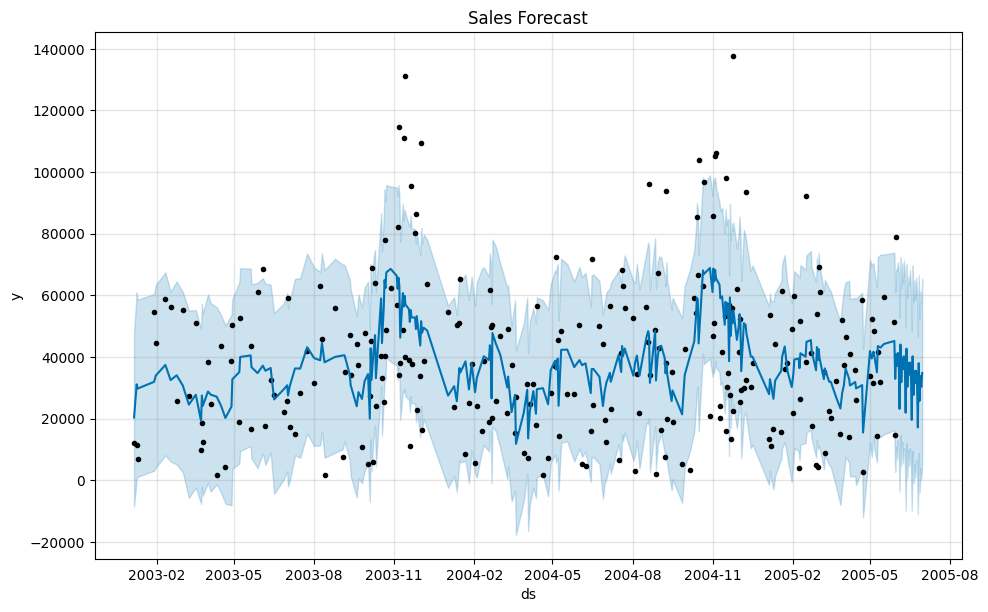

In [5]:
import pandas as pd # Import the pandas library with the alias 'pd'
from prophet import Prophet
import matplotlib.pyplot as plt

df = pd.read_csv('/content/sales_data_sample.csv', encoding='latin-1')

# Assuming your date column is named 'ORDERDATE'
# Prepare data for Prophet, Change 'date' to 'ORDERDATE'
forecast_data = df.groupby('ORDERDATE')['SALES'].sum().reset_index()
# Change 'total' to 'SALES' as this is the column you most likely intend to forecast
forecast_data.columns = ['ds', 'y']  # Rename columns for Prophet

# Initialize and fit model
model = Prophet()
model.fit(forecast_data)

# Create future dataframe
future = model.make_future_dataframe(periods=30)  # Forecast for 30 days
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title('Sales Forecast')
plt.show()